## Section 11: PART II FINANCE: Calculating and Comparing Rates of Return in Python

### LaTex Equation Editor Website: https://www.codecogs.com/eqnedit.php

## 62 Calculating a security's rate of return

**Simple rate of return** = $\frac{ending \; price - beginning\;price}{beginning \;price} = \frac{profit}{investment}$

* Preferable when dealing with multiple assets over the same timeframe

**Logarithmic rate of return =** $log\frac{ending \; price}{beginning \; price}$

* Preferable when making calculations about a single asset over time

## 63 Calculating a security's rate of return in Python – Simple Returns – Part I, II

In [3]:
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [4]:
PG = wb.DataReader('PG', data_source = 'yahoo', start = '1995-1-1')

In [5]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,7.971821
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,7.907916
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,7.796084
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,7.812065
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,7.780110


In [6]:
PG.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-04-04,154.350006,151.259995,153.809998,154.080002,5992000.0,154.080002
2022-04-05,157.369995,153.539993,153.610001,154.619995,7653000.0,154.619995
2022-04-06,157.289993,153.940002,154.419998,156.830002,8884700.0,156.830002
2022-04-07,159.389999,156.970001,157.869995,158.860001,6885800.0,158.860001
2022-04-08,159.919998,158.919998,157.869995,159.719604,517229.0,159.719604


### Simple Rate of Return

$$\frac{P_{1} - P_{0}}{P_{0}} = \frac{P_{1}}{P_{0}} - 1$$

In [8]:
PG['Simple Return'] = PG['Adj Close']/PG['Adj Close'].shift(1) - 1
print (PG['Simple Return'])

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014142
1995-01-06    0.002050
1995-01-09   -0.004090
                ...   
2022-04-04   -0.006512
2022-04-05    0.003505
2022-04-06    0.014293
2022-04-07    0.012944
2022-04-08    0.005411
Name: Simple Return, Length: 6867, dtype: float64


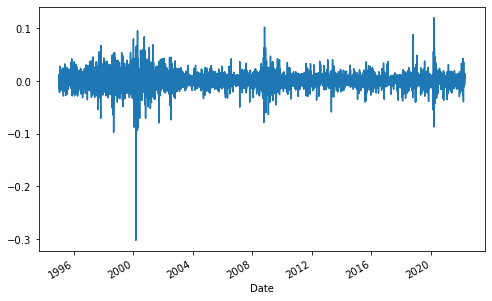

In [13]:
PG['Simple Return'].plot(figsize = (8,5))
plt.show()

In [15]:
avg_returns_d = PG['Simple Return'].mean()
avg_returns_d

0.0005367252547074237

In [16]:
avg_return_a = PG['Simple Return'].mean() * 250
avg_return_a

0.13418131367685593

In [17]:
avg_return_a_percentage = str(round(avg_return_a,5) * 100) + '%'
print (avg_return_a_percentage)

13.418%


## 65 Calculating a security's rate of return in Python – Logarithmic Returns

### Logarithmic Return

$$ln \frac{P_{t}}{P_{t-1}}$$

In [18]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close,Simple Return
Date,,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,7.971821,NaN
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,7.907916,-0.008016
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,7.796084,-0.014142
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,7.812065,0.002050
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,7.780110,-0.004090


In [21]:
PG['Log Return'] = np.log(PG['Adj Close']/PG['Adj Close'].shift(1))
PG['Log Return']

Date
1995-01-03         NaN
1995-01-04   -0.008049
1995-01-05   -0.014243
1995-01-06    0.002048
1995-01-09   -0.004099
                ...   
2022-04-04   -0.006534
2022-04-05    0.003499
2022-04-06    0.014192
2022-04-07    0.012861
2022-04-08    0.005396
Name: Log Return, Length: 6867, dtype: float64

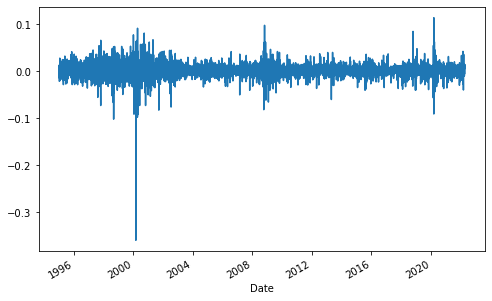

In [29]:
PG['Log Return'].plot(figsize=(8,5))
plt.show()

In [24]:
avg_log_returns_d = PG['Log Return'].mean()
avg_log_returns_d

0.00043657251363034695

In [25]:
avg_log_returns_a = PG['Log Return'].mean() * 250
avg_log_returns_a

0.10914312840758673

In [26]:
avg_log_returns_a_percentage = str(round(avg_log_returns_a,5) * 100) + '%'
print (avg_log_returns_a_percentage)

10.914%


## 67 Calculating a Portfolio of Securities' Rate of Return

In [30]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [31]:
tickers = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source = 'yahoo', start = '1995-1-1')['Adj Close']

In [32]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6867 entries, 1995-01-03 to 2022-04-08
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6867 non-null   float64
 1   MSFT    6867 non-null   float64
 2   F       6867 non-null   float64
 3   GE      6867 non-null   float64
dtypes: float64(4)
memory usage: 268.2 KB


In [33]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,7.971821,2.377005,3.953285,31.972105
1995-01-04,7.907916,2.394284,4.059653,31.972105
1995-01-05,7.796089,2.354790,4.024197,32.050476
1995-01-06,7.812062,2.394284,4.024197,31.893753
1995-01-09,7.780111,2.379474,4.095106,31.580301


In [34]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2022-04-04,154.080002,314.970001,16.660,92.019997
2022-04-05,154.619995,310.880005,15.820,90.099998
2022-04-06,156.830002,299.500000,15.390,89.910004
2022-04-07,158.860001,301.369995,14.960,89.459999
2022-04-08,160.360306,298.450012,15.125,89.629997


### Normalization to 100:

$$\frac{P_{t}}{P_{0}}*100$$

In [36]:
mydata.iloc[0] #this will extract data from the first row of the table

PG       7.971821
MSFT     2.377005
F        3.953285
GE      31.972105
Name: 1995-01-03 00:00:00, dtype: float64

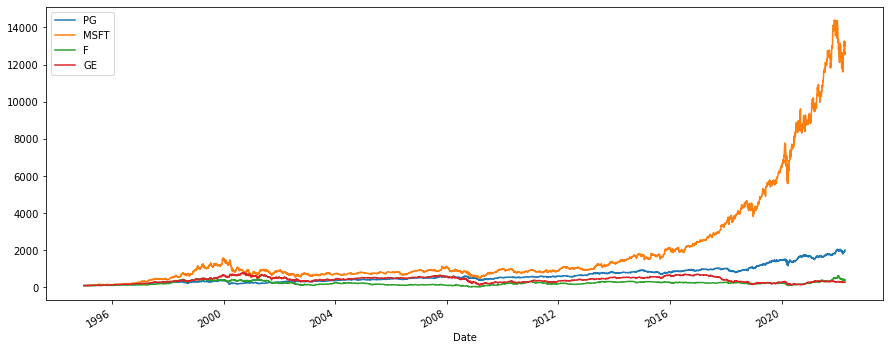

In [37]:
#The normalization is a tenique usually used in Finance
#So that we can have a good landmark at the starting point shown below
(mydata / mydata.iloc[0] * 100).plot(figsize = (15,6)) 
plt.show()

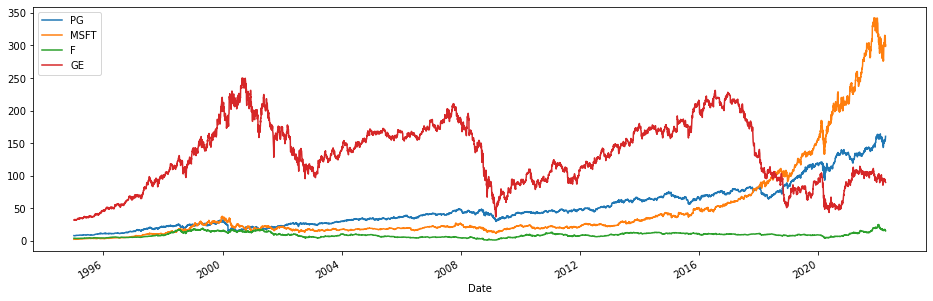

In [39]:
#If we don't normalize it, we will see the adjusted closing prices of all companies plotted directly 
#and we will not have a good landmark

mydata.plot(figsize = (16,5))
plt.show()

In [41]:
#to apply loc, we will have to indicate the precise 'label' corresponding to the first row
#because the dates are labels, and that is the requirement to use loc
#Note that it is using brackets not parentheses to indicate location

mydata.loc['1995-01-03'] #The dates are labels. 

PG       7.971821
MSFT     2.377005
F        3.953285
GE      31.972105
Name: 1995-01-03 00:00:00, dtype: float64

In [42]:
# Alternatively, we can use iloc, but we will need to indicate the position of the data we want. 
# In this case, we want the first row of the table, and therefore, position is 0

mydata.iloc[0]

PG       7.971821
MSFT     2.377005
F        3.953285
GE      31.972105
Name: 1995-01-03 00:00:00, dtype: float64

### Calculating the Return of a Portfolio of Securities

In [43]:
returns = (mydata / mydata.shift(1)) - 1 #note that this is daily returns
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014141,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016772,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017621,-0.009828


In [44]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [45]:
#np.dot() - calculates vector or matrix products  
#the output: dot product between the variables

np.dot(returns, weights)  

array([        nan,  0.0065397 , -0.00922967, ..., -0.01290052,
       -0.00343941,  0.00317121])

In [47]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.134328
MSFT    0.224967
F       0.129379
GE      0.088883
dtype: float64

In [49]:
np.dot(annual_returns, weights)

0.14438942458913584

In [51]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + '%'
print (pfolio_1)

14.438999999999998%


In [57]:
round(np.dot(annual_returns, weights) * 100, 5)

14.43894

In [58]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [60]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5) * 100) + '%'
print (pfolio_1)
print (pfolio_2)

14.438999999999998%
16.756999999999998%


## 68 Popular stock indices that can help us understand financial markets

### The Top 3 US Market Indices

1. S&P 500
    * 500 largest listed companies
    * Diverse constituency
    * Market-cap-weighted
    
    A true representation of the US stock market
    
2. Dowjones
    * 30 large public 
    * one of the historically oldest indices
    
    Not a true representation of the US stock market
    
3. Nasdaq
    * Grouped securities
    * Most companies listed are IT companies
    
    Shows the rate of return of tech stocks

### Some foreign stock indices

1. FTSE (UK)
2. DAX (Germany)
3. Nikkei (Japan)
4. SSE (China)

#### Stock indices are an excellent comparator to understand how your own stocks are performing

#### They indicate what to expect if you invest in a diversified portfolio


## 69 Calculating the Indices' Rate of Return

In [61]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [63]:
# S&P500 - '^GSPC'
# NASDAQ - '^IXIC'
# German DAX - '^GDAXI'
# NYSE COMPOSITE (DJ) - '^NYA'
# London FTSE - '^FTSE'

#Note: Historical data for FTSE is not available through the website 
#and so it isn't available to reader.

tickers = ['^GSPC', '^IXIC', '^GDAXI','^NYA']

ind_data = pd.DataFrame()

for t in tickers:
    ind_data[t] = wb.DataReader(t, data_source = 'yahoo', start = '1997-1-1')['Adj Close']



In [64]:
ind_data.head()

,^GSPC,^IXIC,^GDAXI,^NYA
Date,,,,
1997-01-02,737.010010,1280.699951,2820.810059,4118.790039
1997-01-03,748.030029,1310.680054,2863.260010,4166.680176
1997-01-06,747.650024,1316.400024,2890.199951,4169.009766
1997-01-07,753.229980,1327.729980,2876.340088,4196.709961
1997-01-08,748.409973,1320.349976,2904.080078,4179.270020


In [65]:
ind_data.tail()

,^GSPC,^IXIC,^GDAXI,^NYA
Date,,,,
2022-04-04,4582.640137,14532.549805,14518.160156,16829.750000
2022-04-05,4525.120117,14204.169922,14424.360352,16645.050781
2022-04-06,4481.149902,13888.820312,14151.690430,16587.099609
2022-04-07,4500.209961,13897.299805,14078.150391,16631.449219
2022-04-08,4488.279785,13710.996094,14283.669922,16689.953125


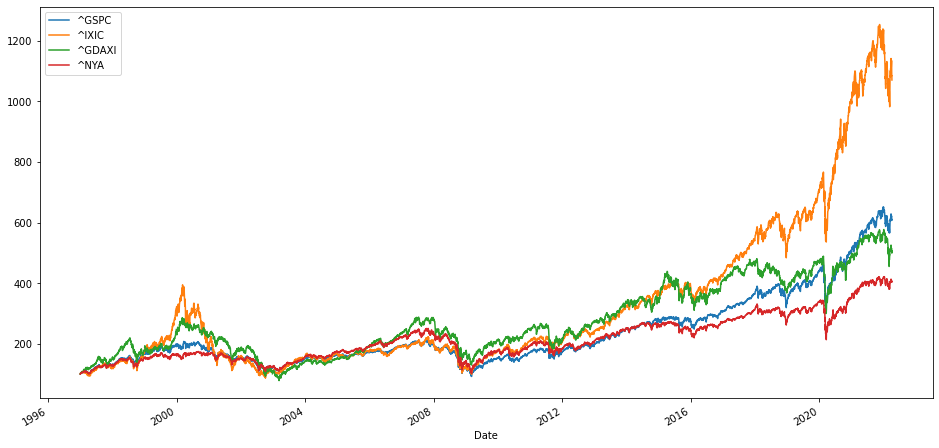

In [67]:
# Normalization of the data

(ind_data / ind_data.iloc[0] * 100).plot(figsize = (16,8))
plt.show()

In [69]:
ind_returns = (ind_data / ind_data.shift(1)) - 1
ind_returns.tail()

,^GSPC,^IXIC,^GDAXI,^NYA
Date,,,,
2022-04-04,0.008091,0.019006,0.004962,0.002502
2022-04-05,-0.012552,-0.022596,-0.006461,-0.010975
2022-04-06,-0.009717,-0.022201,-0.018903,-0.003482
2022-04-07,0.004253,0.000611,-0.005197,0.002674
2022-04-08,-0.002651,-0.013406,0.014598,0.003518


In [70]:
annual_ind_returns = ind_returns.mean() * 250
annual_ind_returns

^GSPC     0.090033
^IXIC     0.124500
^GDAXI    0.076380
^NYA      0.073244
dtype: float64

### Compare the Performance of Stock and Stock Indices

In [71]:
tickers = ['PG', '^GSPC', '^DJI']

data_2 = pd.DataFrame()

for t in tickers:
    data_2[t] = wb.DataReader(t, data_source = 'yahoo', start = '1997-1-1')['Adj Close']

In [72]:
data_2.tail()

,PG,^GSPC,^DJI
Date,,,
2022-04-04,154.080002,4582.640137,34921.878906
2022-04-05,154.619995,4525.120117,34641.179688
2022-04-06,156.830002,4481.149902,34496.511719
2022-04-07,158.860001,4500.209961,34583.570312
2022-04-08,160.100006,4488.279785,34721.121094


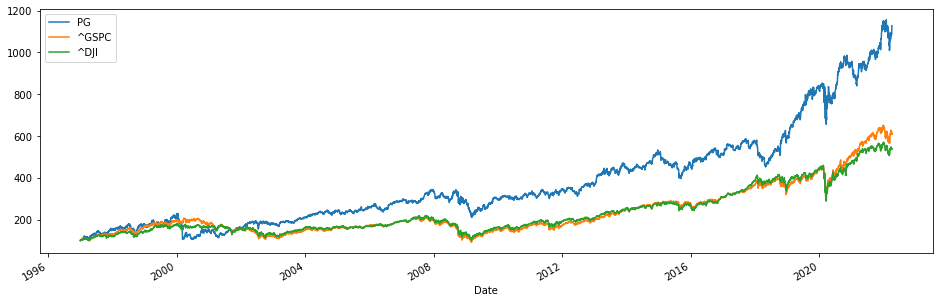

In [75]:
(data_2 / data_2.iloc[0] * 100).plot(figsize = (16,5))
plt.show()